## Importings

In [70]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [40]:
!pip show tensorflow

Name: tensorflow
Version: 2.19.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\1xopw\Envs\tf-env\Lib\site-packages
Requires: absl-py, astunparse, flatbuffers, gast, google-pasta, grpcio, h5py, keras, libclang, ml-dtypes, numpy, opt-einsum, packaging, protobuf, requests, setuptools, six, tensorboard, tensorflow-io-gcs-filesystem, termcolor, typing-extensions, wrapt
Required-by: 


## Training and Validation Splitting for Such Probelm [Large Image Dataset]
---------------
So, when I first look up to the probelm, I thought... How could we load the images in the first place and how could we splitting them?

I serached on something or a way that we can do that and I've found something called `ImageDataGenerator` in `Keras` preprocessing, which basically just load the dataset (which is the images of cats and dogs in our problem) and `Keras` will load them in batches-like; minimizing the load on our computers.

In [41]:
for dirname, _, filenames in os.walk('../Data'):
    print(dirname)

../Data
../Data\animals
../Data\animals\cat
../Data\animals\dog


In [42]:
directory_data = '../Data/animals' # This where the data is stored in my files directory

data = ImageDataGenerator(rescale=1./255, validation_split=0.2) # Rescale the pixel values to be between 0 and 1 & split the data into training and validation sets

### Now, after I've ensured that I take the whole data stored and normalize it and split it in `data` variables, I can preceed with assiging the train & validation sets

In [43]:
training_set = data.flow_from_directory(
    directory_data,
    target_size = (256, 256), 
    batch_size = 32, # making the batches loads 32 images at a time
    class_mode = 'binary', 
    subset = 'training', 
    seed = 42
)

Found 800 images belonging to 2 classes.


In [44]:
print(training_set.class_indices)
print(training_set.image_shape)

{'cat': 0, 'dog': 1}
(256, 256, 3)


In [45]:
training_set[0][1]

array([1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 0.],
      dtype=float32)

We've made sure now that the `training_set` is accurately normalized with the `ImageDataGenerator`, becuase

```Python
training_set[0][1]
```
Will return the ***first batch*** along with their ***labels***

In [46]:
training_set[0][0]

array([[[[0.73333335, 0.72156864, 0.7019608 ],
         [0.7294118 , 0.7137255 , 0.69803923],
         [0.7294118 , 0.7137255 , 0.69411767],
         ...,
         [0.70980394, 0.6862745 , 0.6627451 ],
         [0.7058824 , 0.6862745 , 0.65882355],
         [0.7019608 , 0.6784314 , 0.654902  ]],

        [[0.7294118 , 0.7176471 , 0.7019608 ],
         [0.7254902 , 0.7137255 , 0.69411767],
         [0.73333335, 0.7137255 , 0.69411767],
         ...,
         [0.70980394, 0.6901961 , 0.65882355],
         [0.7019608 , 0.68235296, 0.654902  ],
         [0.7058824 , 0.68235296, 0.654902  ]],

        [[0.7294118 , 0.7137255 , 0.69803923],
         [0.73333335, 0.7176471 , 0.7019608 ],
         [0.7372549 , 0.7176471 , 0.7019608 ],
         ...,
         [0.7058824 , 0.68235296, 0.654902  ],
         [0.7019608 , 0.68235296, 0.654902  ],
         [0.7058824 , 0.6862745 , 0.654902  ]],

        ...,

        [[0.77647066, 0.7843138 , 0.8235295 ],
         [0.7568628 , 0.76470596, 0.8078432 ]

In [47]:
validation_set = data.flow_from_directory(
    directory_data, 
    target_size = (256, 256),
    batch_size = 32,
    class_mode = 'binary',
    subset = 'validation',
    seed = 43
)

Found 200 images belonging to 2 classes.


In [48]:
print(validation_set.class_indices)
print(validation_set.image_shape)

{'cat': 0, 'dog': 1}
(256, 256, 3)


In [49]:
print(validation_set.filenames)

['cat\\00000-4122619873.png', 'cat\\00001-4122619874.png', 'cat\\00002-4122619875.png', 'cat\\00003-4122619876.png', 'cat\\00004-4122619877.png', 'cat\\00005-4122619878.png', 'cat\\00006-4122619879.png', 'cat\\00007-4122619880.png', 'cat\\00008-4122619881.png', 'cat\\00009-4122619882.png', 'cat\\00010-4122619883.png', 'cat\\00011-4122619884.png', 'cat\\00012-4122619885.png', 'cat\\00013-4122619886.png', 'cat\\00014-4122619887.png', 'cat\\00015-4122619888.png', 'cat\\00016-4122619889.png', 'cat\\00017-4122619890.png', 'cat\\00018-4122619891.png', 'cat\\00019-4122619892.png', 'cat\\00020-4122619893.png', 'cat\\00021-4122619894.png', 'cat\\00022-4122619895.png', 'cat\\00023-4122619896.png', 'cat\\00024-4122619897.png', 'cat\\00025-200124335.png', 'cat\\00026-200124336.png', 'cat\\00027-200124337.png', 'cat\\00028-200124338.png', 'cat\\00029-200124339.png', 'cat\\00030-200124340.png', 'cat\\00031-200124341.png', 'cat\\00032-200124342.png', 'cat\\00033-200124343.png', 'cat\\00034-200124344.

In [50]:
img, labl = training_set[0]

In [51]:
print(img.shape)

(32, 256, 256, 3)


In [52]:
print(labl.shape)

(32,)


### Let Us Visualize Some Figures using The Training Set [images and lables]


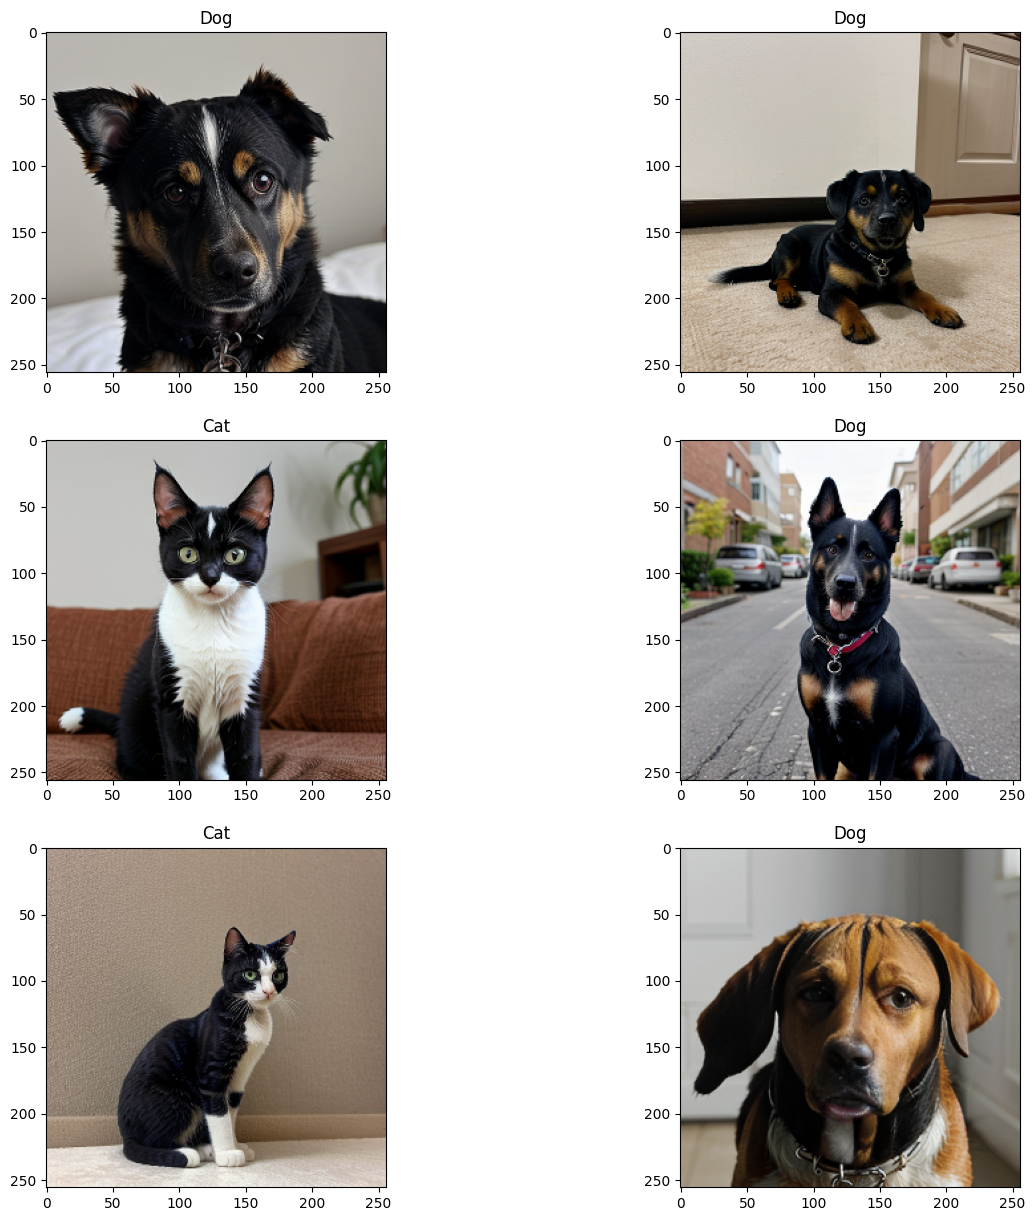

In [53]:
plt.figure(figsize=(15, 15))
for i in range(6):
    plt.subplot(3, 2, i+1)
    plt.imshow(img[i])
    plt.title( 'Dog' if labl[i] == 1 else 'Cat')
plt.show()

## That's Enough... Now, Let Dive Into Train The CNN Model 🔥

In [54]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3, 3),padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),
    
    layers.Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (2, 2), strides = 2, padding = 'valid'),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation = 'sigmoid')
])

c:\Users\1xopw\Envs\tf-env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [55]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 246016)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │    31,490,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,517,889 (120.23 MB)

 Trainable params: 31,517,889 (120.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [57]:
hist = model.fit(training_set, epochs = 15, validation_data = validation_set)

c:\Users\1xopw\Envs\tf-env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.5809 - loss: 2.4177 - val_accuracy: 0.6600 - val_loss: 0.6049
Epoch 2/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.7704 - loss: 0.4983 - val_accuracy: 0.8750 - val_loss: 0.3548
Epoch 3/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9353 - loss: 0.2040 - val_accuracy: 0.9300 - val_loss: 0.1808
Epoch 4/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.9994 - loss: 0.0262 - val_accuracy: 0.9300 - val_loss: 0.1825
Epoch 5/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 0.9997 - loss: 0.0060 - val_accuracy: 0.8950 - val_loss: 0.2396
Epoch 6/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 0.0050 - val_accuracy: 0.9450 - val_loss: 0.1914
Epoch 7/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 1.0000 - loss: 5.7777e-04 - val_accuracy: 0.9450 - val_loss: 0.2169
Epoch 8/15
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 1s/step - accuracy: 1.0000 - loss: 1.9718e-04 - val_accuracy: 0.9450 - v

In [58]:
test_loss, test_acc = model.evaluate(validation_set)
print(f"Test Accuracy: {test_acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 4s 490ms/step - accuracy: 0.9377 - loss: 0.2806
Test Accuracy: 0.9300000071525574


Text(0.5, 1.0, 'Model Accuracy')

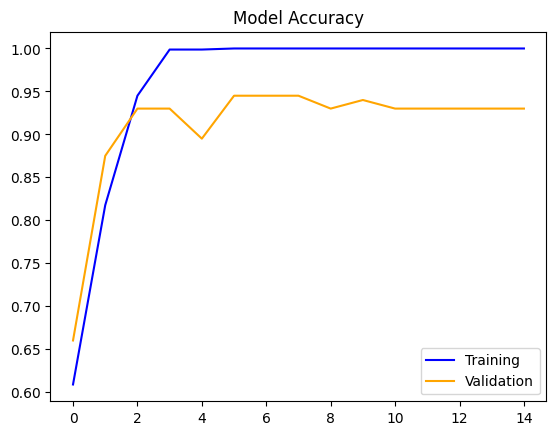

In [59]:
plt.plot(hist.history['accuracy'], color = 'blue', label = 'Training')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'Validation')
plt.legend()
plt.title('Model Accuracy')

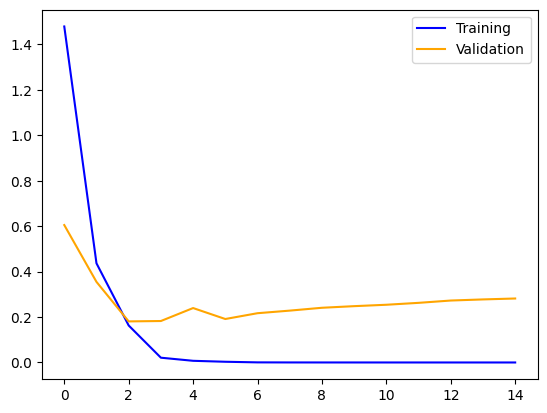

In [60]:
plt.plot(hist.history['loss'], color = 'blue', label = 'Training')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Validation')
plt.legend()
plt.show()

# **Findings**

- **Accuracy**: 88%
- **Loss**: 0.4693
- **Observations**:
    - The CNN model seems to overfitts 
    - The loss seems to be a little bit acceptable
    - It may needs some techinique on improving & early stopping to solve the overfitts problem



> How Possibly Could We Go In Improving The CNN Model?

Let try to increasing the `stride` and `MaxPooling`, also to do `EarlyStopping`to see if its can get better.

In [61]:
model = models.Sequential([
    layers.Conv2D(32, kernel_size = (3, 3),padding = 'valid', activation = 'relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size = (3, 3), strides = 3, padding = 'valid'),
    
    layers.Conv2D(64, kernel_size = (3, 3), padding = 'valid', activation = 'relu'),
    layers.MaxPooling2D(pool_size = (3, 3), strides = 3, padding = 'valid'),
    
    layers.Flatten(),
    
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    
    layers.Dense(1, activation = 'sigmoid')
])

In [62]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 84, 84, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 82, 82, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 27, 27, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 46656)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │     5,972,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,999,809 (22.89 MB)

 Trainable params: 5,999,809 (22.89 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(
    optimizer = 'adam', 
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [92]:
callback = EarlyStopping(monitor="val_loss",
    patience=3,
    restore_best_weights=True,
    start_from_epoch=0,)

In [93]:
hist = model.fit(training_set, epochs = 10, validation_data = validation_set, callbacks=[callback])

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 29s 1s/step - accuracy: 1.0000 - loss: 2.4800e-04 - val_accuracy: 0.9350 - val_loss: 0.2509
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 2.2178e-04 - val_accuracy: 0.9400 - val_loss: 0.2547
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 2.3458e-04 - val_accuracy: 0.9350 - val_loss: 0.2589
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 30s 1s/step - accuracy: 1.0000 - loss: 1.7336e-04 - val_accuracy: 0.9350 - val_loss: 0.2606


In [94]:
test_loss, test_acc = model.evaluate(validation_set)
print(f"Test Accuracy: {test_acc}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 688ms/step - accuracy: 0.9542 - loss: 0.1285
Test Accuracy: 0.9350000023841858


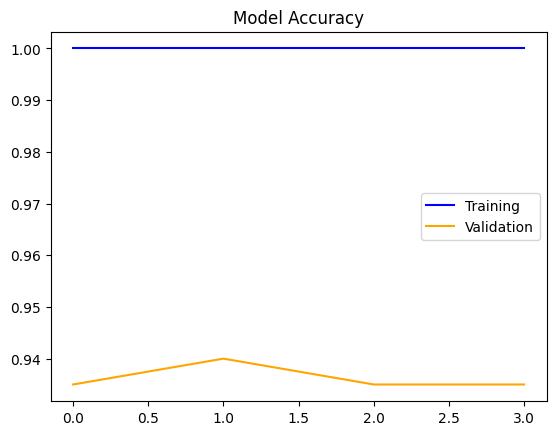

In [95]:
plt.plot(hist.history['accuracy'], color = 'blue', label = 'Training')
plt.plot(hist.history['val_accuracy'], color = 'orange', label = 'Validation')
plt.legend()
plt.title('Model Accuracy')
plt.show()

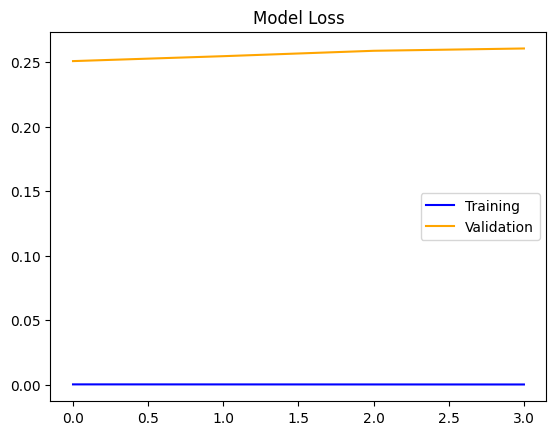

In [96]:
plt.plot(hist.history['loss'], color = 'blue', label = 'Training')
plt.plot(hist.history['val_loss'], color = 'orange', label = 'Validation')
plt.legend()
plt.title('Model Loss')
plt.show()

In [97]:
predictions = model.predict(validation_set)

7/7 ━━━━━━━━━━━━━━━━━━━━ 5s 717ms/step


In [98]:
predictions

array([[1.30711347e-01],
       [1.55526914e-06],
       [9.99989212e-01],
       [1.83701673e-07],
       [9.84855811e-04],
       [1.43494979e-01],
       [7.63752996e-06],
       [9.99756277e-01],
       [9.99993324e-01],
       [5.24678349e-01],
       [8.34947343e-07],
       [9.97661948e-01],
       [9.99985218e-01],
       [9.98134971e-01],
       [1.93321853e-06],
       [9.99999881e-01],
       [9.99999940e-01],
       [4.03596605e-05],
       [9.08121001e-04],
       [4.17832256e-04],
       [1.40044165e-06],
       [9.98605490e-01],
       [9.98513579e-01],
       [4.38622628e-05],
       [9.99844670e-01],
       [9.99999762e-01],
       [1.27048310e-07],
       [2.94221412e-08],
       [5.59300010e-04],
       [1.08773600e-06],
       [9.99517381e-01],
       [1.29406235e-05],
       [4.51982987e-06],
       [9.99979854e-01],
       [9.99998629e-01],
       [9.82288361e-01],
       [5.81901427e-03],
       [1.67038615e-06],
       [9.99597430e-01],
       [9.99999285e-01],


## Final Findings

- **Accuracy**: ~94%
- **Loss**: 0.12
- **Observations**:
    - As we can see thats increasing the `stride` & `MaxPooling` helps to overcome the overfitting.
    - The `EarlyStopping` really efficient when it comes to trying to absolutly avoid the overfitting as we can see in the above figures.